statsmodels은 상태공간모형을 위한 statespace 서브패키지에 동적선형모형(DLM: Dynamic Linear Model) 칼만필터링을 위한 KalmanFilter 클래스와 FilterResults 클래스를 제공한다. 여기에서는 이 클래스의 사용법을 간단히 소개한다. 보다 자세한 내용은 문서 웹사이트를 참조한다.

+ http://www.statsmodels.org/dev/generated/statsmodels.tsa.statespace.kalman_filter.KalmanFilter.html
+ http://www.statsmodels.org/dev/generated/statsmodels.tsa.statespace.kalman_filter.FilterResults.html


## 클래스 임포트

KalmanFilter는 statsmodel.api 서브패키지에 노출되어 있지 않다. 따라서 다음과 같이 직접 클래스를 임포트 해야 한다. FilterResults 클래스는 필터링 결과로 나오는 것이므로 별도로 임포트할 필요가 없다.

In [1]:
from statsmodels.tsa.statespace.kalman_filter import KalmanFilter

## 클래스 생성

KalmanFilter 클래스는 다음과 같은 동적 선형 모형 수식을 가정하고 있다.

\begin{eqnarray}
\alpha_t  &=& T_t \alpha_{t-1} &+& c_t &+& R_t \eta_t \\
y_t       &=& Z_t \alpha_t     &+& d_t &+& \varepsilon_t \\
\end{eqnarray}

+ 𝛼𝑡  : 상태 벡터
+ 𝑇  : transition matrix
+ 𝑐  : state intercept vector
+ 𝑅  : selection matrix
+ 𝜂𝑡∼𝑁(0,𝑄𝑡)  : 이노베이션 과정 벡터
+ 𝑄  : state covariance matrix
+ 𝑦𝑡  : 관측 벡터
+ 𝑍  : design matrix
+ 𝑑  : observation intercept vector
+ 𝜀𝑡∼𝑁(0,𝐻𝑡)  : 관측 잡음 벡터
+ 𝐻  : observation covariance matrix

클래스 생성을 위한 입력 인수 목록은 다음과 같다.

예를 들어 다음과 같은 로컬 레벨 모형의 경우,

\begin{eqnarray}
\mu_t &=& \mu_{t-1} &+& w_t &,\;\;\; & w_t \sim N(\mu=0, \sigma^2=10) \\
Y_{t} &=& \mu_{t}   &+& v_t &,\;\;\; & v_t \sim N(\mu=0, \sigma^2=100) \\
\end{eqnarray}

다음 코드와 같이 모형을 생성하고 시뮬레이션 할 수 있다.

In [3]:
import matplotlib.pylab as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
import seaborn as sns
import numpy as np

sns.set_style("whitegrid")
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.size'] = 12

path = "/Library/Fonts/NanumGothic.otf"
font_name = fm.FontProperties(fname=path, size=20).get_name()

plt.rc('font', family=font_name)

/Users/imjunghee/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [4]:
# k_endog : 시계열 자료
# k_state : 상태변수의 수
# transition : 상태전이행렬
# selection : 이노베이션 과정에 대한 선택 행렬
# state_cov : 이노베이션 과정의 공분산 행렬 
# design : 설계행렬
# obs_cov : 관측행렬 공분산행렬
model1 = KalmanFilter(k_endog=1, k_states=1, transition=[[1]], selection=[[1]], state_cov=[[10]],
                     design=[[1]], obs_cov=[[100]])

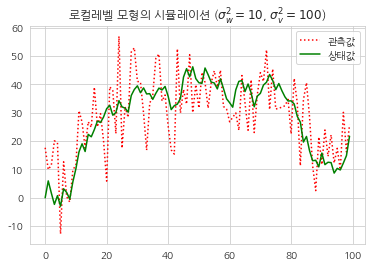

In [5]:
np.random.seed(0)
y1, x1 = model1.simulate(100)

plt.plot(y1, 'r:', label="관측값")
plt.plot(x1, 'g-', label="상태값")
plt.legend()
plt.title("로컬레벨 모형의 시뮬레이션 ($\sigma_w^2 = 10$, $\sigma_v^2 = 100$)")
plt.show()

만약 시뮬레이션이 아니라 실제 시계열(관측값)을 필터링하여 상태값을 추정하는 것이 목적이라면 다음과 같이 관측된 시계열을 넣어 모형을 생성한다.

In [6]:
model2 = KalmanFilter(y1, k_states=1, transition=[[1]], selection=[[1]], state_cov=[[10]],
                     design=[[1]], obs_cov=[[100]])

### 속성
KalmanFilter 클래스는 다음과 같은 속성을 가진다.

### 메서드
KalmanFilter 클래스에서 많이 사용되는 메서드 목록은 다음과 같다.

시뮬레이션 방법은 위에서 보였다. 

필터링의 경우에는 filter 메서드를 실행하기에 앞서 initialize_xxxx 메소드들로 초기 상태를 생성해야 한다. 추정이 완료되면 filtered_state 속성에 추정된 상태값이 저장된다.

In [10]:
model2.initialize_known([0], [[1]])  # 초기상태 생성
result2 = model2.filter()            # 추정

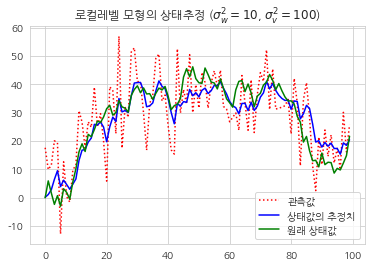

In [14]:
plt.plot(model2.obs[0], 'r:', label="관측값") # 관측시계열의 값
plt.plot(result2.filtered_state[0], "b-", label="상태값의 추정치")  # 추정된 상태값
plt.plot(x1, "g-", label="원래 상태값")
plt.legend()
plt.title("로컬레벨 모형의 상태추정 ($\sigma_w^2 = 10$, $\sigma_v^2 = 100$)")
plt.show()

In [15]:
result2.filtered_state

array([[ 0.17465865,  1.14325582,  2.85906944,  6.47812115,  9.54063939,
         3.92799068,  6.20565798,  4.65626465,  3.00348183,  4.80050885,
         6.66129889, 13.14976279, 16.79378855, 16.99332491, 19.64060615,
        21.04652434, 25.8929257 , 25.64903156, 26.73859013, 24.90528662,
        19.7654523 , 24.99856815, 28.44824408, 26.88042986, 35.00619686,
        30.28242426, 30.75965157, 30.1068892 , 35.85690402, 40.45652989,
        40.61067275, 40.6684562 , 37.75127664, 32.09326646, 32.40233443,
        33.4469895 , 37.68862778, 41.20154498, 39.29278298, 38.46769476,
        34.91565571, 30.04569167, 26.09342668, 33.23101711, 32.33585825,
        33.91184613, 33.66792882, 38.19501807, 35.99287927, 37.04678468,
        35.57720767, 37.91074627, 38.65237602, 36.74781979, 37.76517256,
        39.65687348, 39.49323946, 40.97375356, 38.60089525, 36.62247937,
        33.96778536, 32.45013831, 31.76549956, 29.61002443, 33.25464753,
        33.30298862, 30.74097098, 33.6709225 , 30.7